In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
# http://www.johnwittenauer.net/a-simple-time-series-analysis-of-the-sp-500-index/
# http://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

# http://conference.scipy.org/proceedings/scipy2011/pdfs/statsmodels.pdf

In [25]:
# inspected file and found that the date format is Y-m
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

airline_data = pd.read_csv("AirPassengers.csv", index_col='Month', parse_dates=True, date_parser=dateparse)
print airline_data.dtypes
airline_data.head()

#Passengers    int64
dtype: object


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


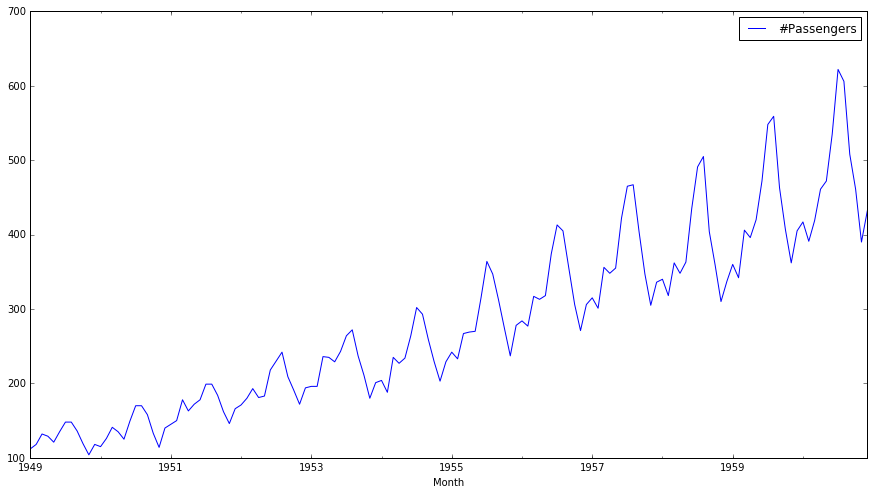

In [28]:
airline_data.plot(figsize=(15,8))

# test for stationarity

In [34]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

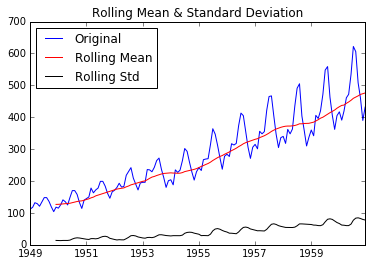

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [36]:
test_stationarity(airline_data['#Passengers'])

In [31]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : str {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information c

In [39]:
lag_correlations

array([ 1.        ,  0.94780793,  0.8754548 ,  0.8053605 ,  0.74992065,
        0.71178403,  0.6804962 ,  0.66147266,  0.65310795,  0.66726219,
        0.69821393,  0.74043402,  0.75756392,  0.71005323,  0.64401241,
        0.58223542,  0.53277901,  0.49610938,  0.46649204,  0.44741011,
        0.43806672,  0.45178871,  0.47580215,  0.5130438 ,  0.52870003,
        0.49032011,  0.43555429,  0.38346456,  0.34408504,  0.31114739,
        0.28610387,  0.26820212,  0.2603464 ,  0.27117705,  0.2918465 ,
        0.3209059 ,  0.33288829,  0.29944588,  0.25043549,  0.20549022,
        0.16664543])

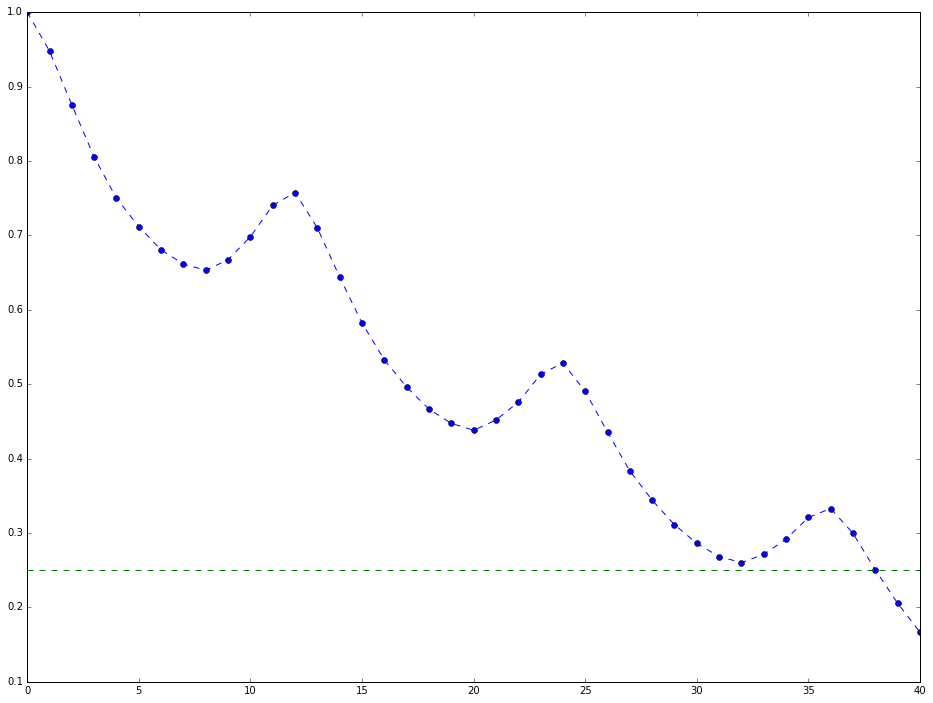

In [49]:
from statsmodels.tsa.stattools import acf  
lag_correlations = acf(airline_data['#Passengers'].iloc[1:])

fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_correlations, marker='o', linestyle='--')  
ax.plot([0.25 for i in lag_correlations], linestyle='--')

plt.show()

In [50]:
from statsmodels.tsa.vector_ar.var_model import VAR 

In [52]:
import statsmodels as sm

In [56]:
# statsmodels vector autoregression VAR 
# some example data
mdata = sm.datasets.macrodata.load_pandas().data

# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]

from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)

mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

# make a VAR model
model = VAR(data)